## FLIGHT FARE PREDICTION

## IMPORT FUNCTION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## READ THE DATA

In [2]:
data=pd.read_excel('Flight_Fare.xlsx')

In [3]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## BASIC CHECK

In [4]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [6]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [8]:
data.describe(include='O')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [9]:
data.shape

(10683, 11)

In [10]:
data.Price.unique()

array([ 3897,  7662, 13882, ...,  9790, 12352, 12648], dtype=int64)

In [11]:
data.Price.value_counts()

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
14153      1
8488       1
7826       1
6315       1
12648      1
Name: Price, Length: 1870, dtype: int64

In [12]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

## CHECK THE NULL VALUES

In [13]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [14]:
data.dropna(inplace=True)
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## SPLIT THE DATA

In [15]:
data['Journey_Day']=pd.to_datetime(data.Date_of_Journey,format="%d/%m/%Y").dt.day
data['Journey_Month']=pd.to_datetime(data.Date_of_Journey,format="%d/%m/%Y").dt.month
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [16]:
data['Dep_hour']=pd.to_datetime(data.Dep_Time).dt.hour
data['Dep_minute']=pd.to_datetime(data.Dep_Time).dt.minute
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [17]:
data['Arrival_hour']=pd.to_datetime(data.Arrival_Time).dt.hour
data['Arrival_minute']=pd.to_datetime(data.Arrival_Time).dt.minute
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [18]:
data['Duration']=pd.to_timedelta(data.Duration)

In [19]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,0 days 02:50:00,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,0 days 07:25:00,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,0 days 19:00:00,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,0 days 05:25:00,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,0 days 04:45:00,1 stop,No info,13302,1,3,16,50,21,35


In [20]:
data['Duration_hour']=data.Duration.dt.components['hours']
data['Duration_minute']=data.Duration.dt.components['minutes']
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,0 days 02:50:00,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,0 days 07:25:00,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,0 days 19:00:00,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,0 days 05:25:00,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,0 days 04:45:00,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [21]:
data.drop(columns=["Date_of_Journey","Dep_Time","Arrival_Time","Duration","Route","Additional_Info"],axis=1,inplace=True)
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


## CATEGORICAL TO NUMERICAL

In [22]:
Airline=data['Airline']
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [23]:
Source=data['Source']
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [24]:
Destination=data['Destination']
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [25]:
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [26]:
data.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [27]:
data.drop(columns=['Airline','Source','Destination'],axis=1,inplace=True)
data.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,0,3897,24,3,22,20,1,10,2,50
1,2,7662,1,5,5,50,13,15,7,25
2,2,13882,9,6,9,25,4,25,19,0
3,1,6218,12,5,18,5,23,30,5,25
4,1,13302,1,3,16,50,21,35,4,45


In [28]:
data=pd.concat([data,Airline,Source,Destination],axis=1)
data.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [29]:
data.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_hour',
       'Dep_minute', 'Arrival_hour', 'Arrival_minute', 'Duration_hour',
       'Duration_minute', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

## EXPLORATARY DATA ANALYSIS

## UNIVARIATE ANALYSIS

<Axes: xlabel='Price', ylabel='Count'>

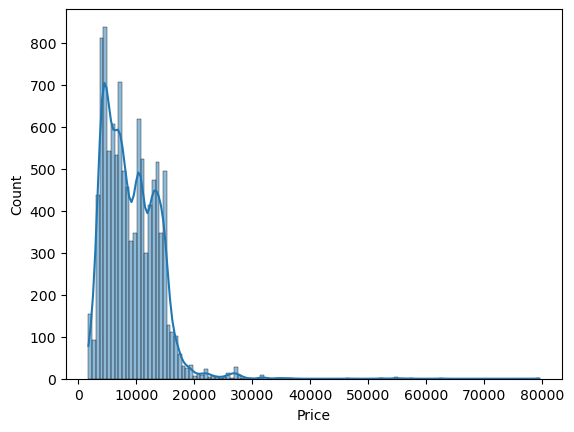

In [30]:
sns.histplot(data=data,x='Price',kde=True)

<Axes: xlabel='Total_Stops', ylabel='count'>

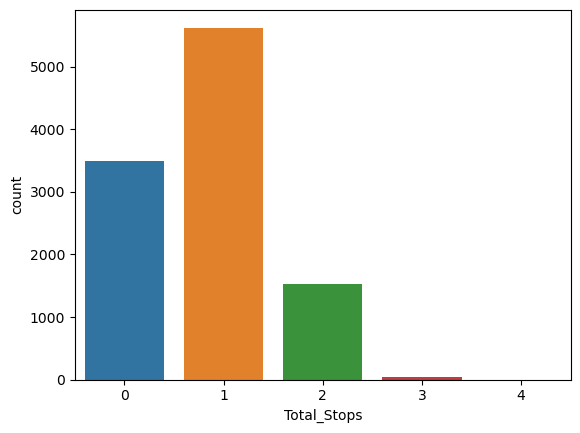

In [31]:
sns.countplot(data=data,x='Total_Stops')

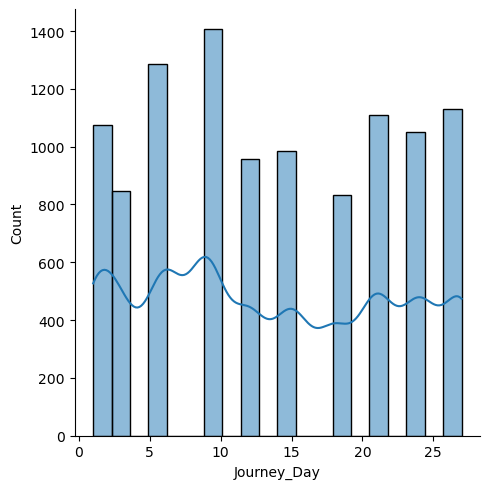

In [32]:
sns.displot(data=data,x='Journey_Day',kde=True)

## BINARY ANALYSIS

<Axes: xlabel='Duration_hour', ylabel='Price'>

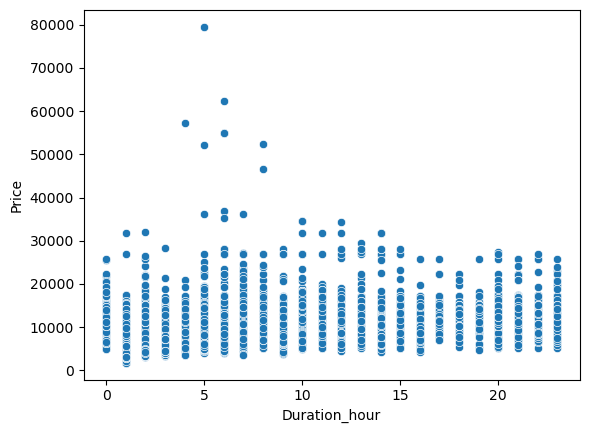

In [33]:
sns.scatterplot(data=data,y='Price',x='Duration_hour')
    

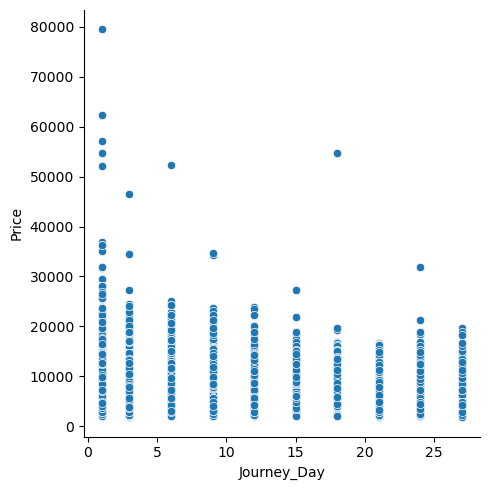

In [34]:
sns.relplot(data=data,x='Journey_Day',y='Price')

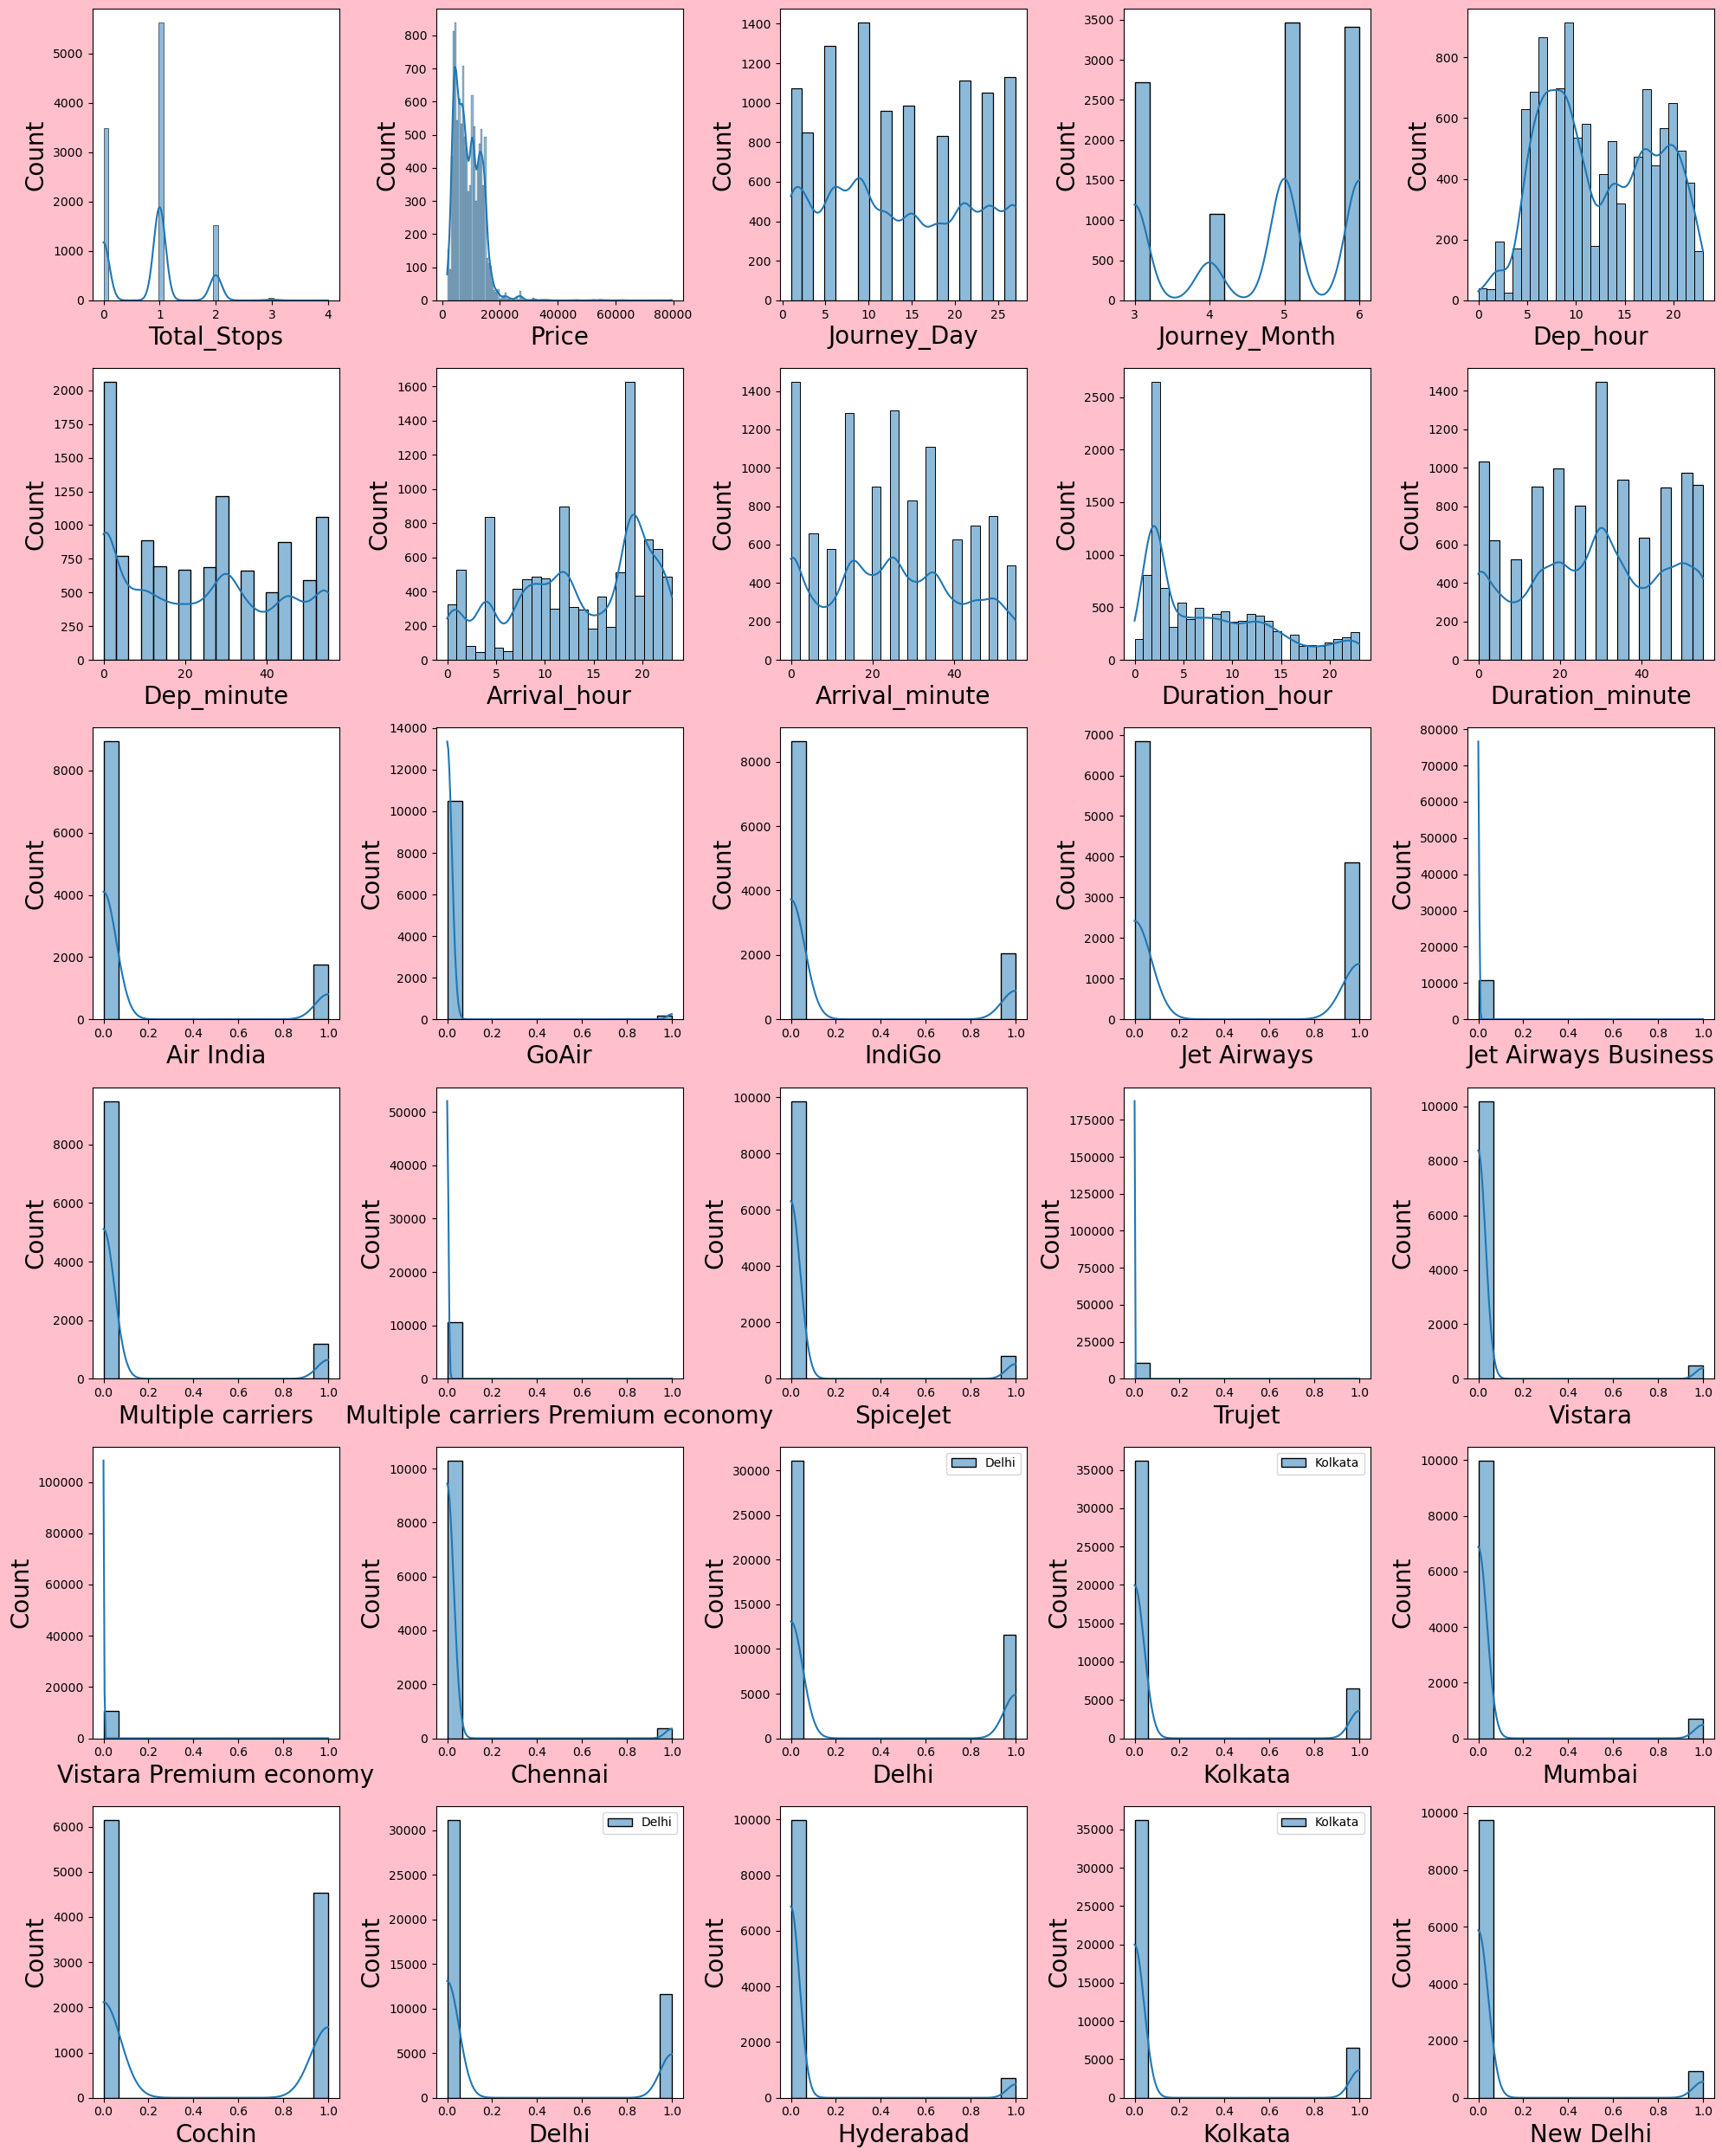

In [35]:
plt.figure(figsize=(20,25),facecolor='pink')
plotnumber=1

for column in data:
    if plotnumber<=30:
        ax=plt.subplot(6,5,plotnumber)
        sns.histplot(data[column],kde=True)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

## CHECK THE OUTLIERS

<Axes: xlabel='Price'>

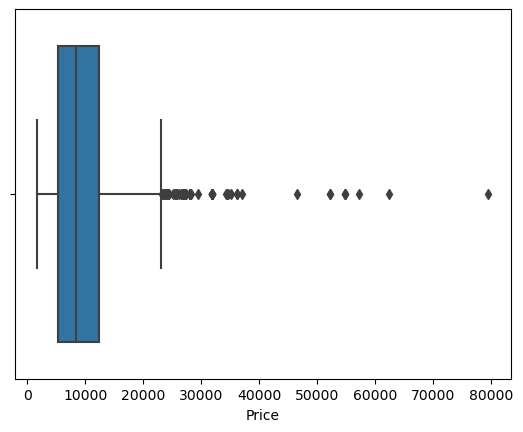

In [36]:
sns.boxplot(data=data,x='Price')

In [37]:
Q1=data['Price'].quantile(0.25)
print('Lower_Quantile',Q1)
Q3=data['Price'].quantile(0.75)
print('Upper_Quantile',Q3)

Lower_Quantile 5277.0
Upper_Quantile 12373.0


In [38]:
IQR=Q3-Q1
IQR

7096.0

In [39]:
lower_limit=Q1-1.5*IQR
print("Lower_limit",lower_limit)
upper_limit=Q3+1.5*IQR
print("Upper_limit",upper_limit)

Lower_limit -5367.0
Upper_limit 23017.0


In [40]:
data.loc[data['Price']<lower_limit]

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi


In [41]:
data.loc[data['Price']>upper_limit]

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
123,1,27430,1,3,23,0,19,15,20,15,...,0,0,1,0,0,1,0,0,0,0
396,1,36983,1,3,12,50,19,15,6,25,...,0,0,1,0,0,1,0,0,0,0
486,1,26890,1,3,8,55,15,15,6,20,...,0,0,0,0,0,0,0,0,0,1
510,1,26890,1,3,7,0,12,25,5,25,...,0,0,0,0,0,0,0,0,0,1
597,2,25139,6,3,9,40,15,15,5,35,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,2,24210,6,3,19,50,16,50,21,0,...,0,0,0,0,1,0,0,1,0,0
10364,1,57209,1,3,9,45,14,25,4,40,...,0,0,0,0,0,0,0,0,0,1
10383,1,26890,1,3,7,0,5,5,22,5,...,0,0,0,0,0,0,0,0,0,1
10439,1,31825,1,3,18,40,9,0,14,20,...,0,0,0,0,0,0,0,0,0,1


In [42]:
data.loc[data['Price']>upper_limit,"Price"]=data['Price'].mean()

<Axes: xlabel='Price'>

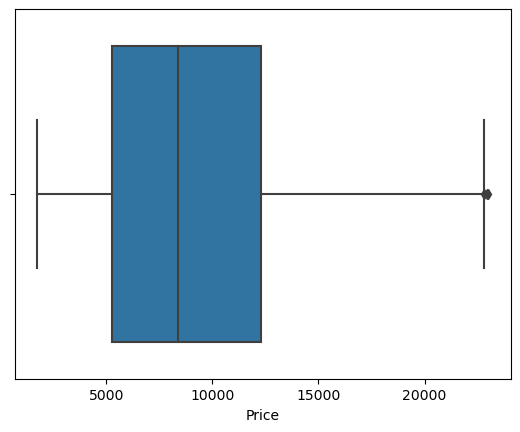

In [43]:
sns.boxplot(data=data,x='Price')

## FEATURE SELECTION

### CHECKING CORELATION

<Axes: >

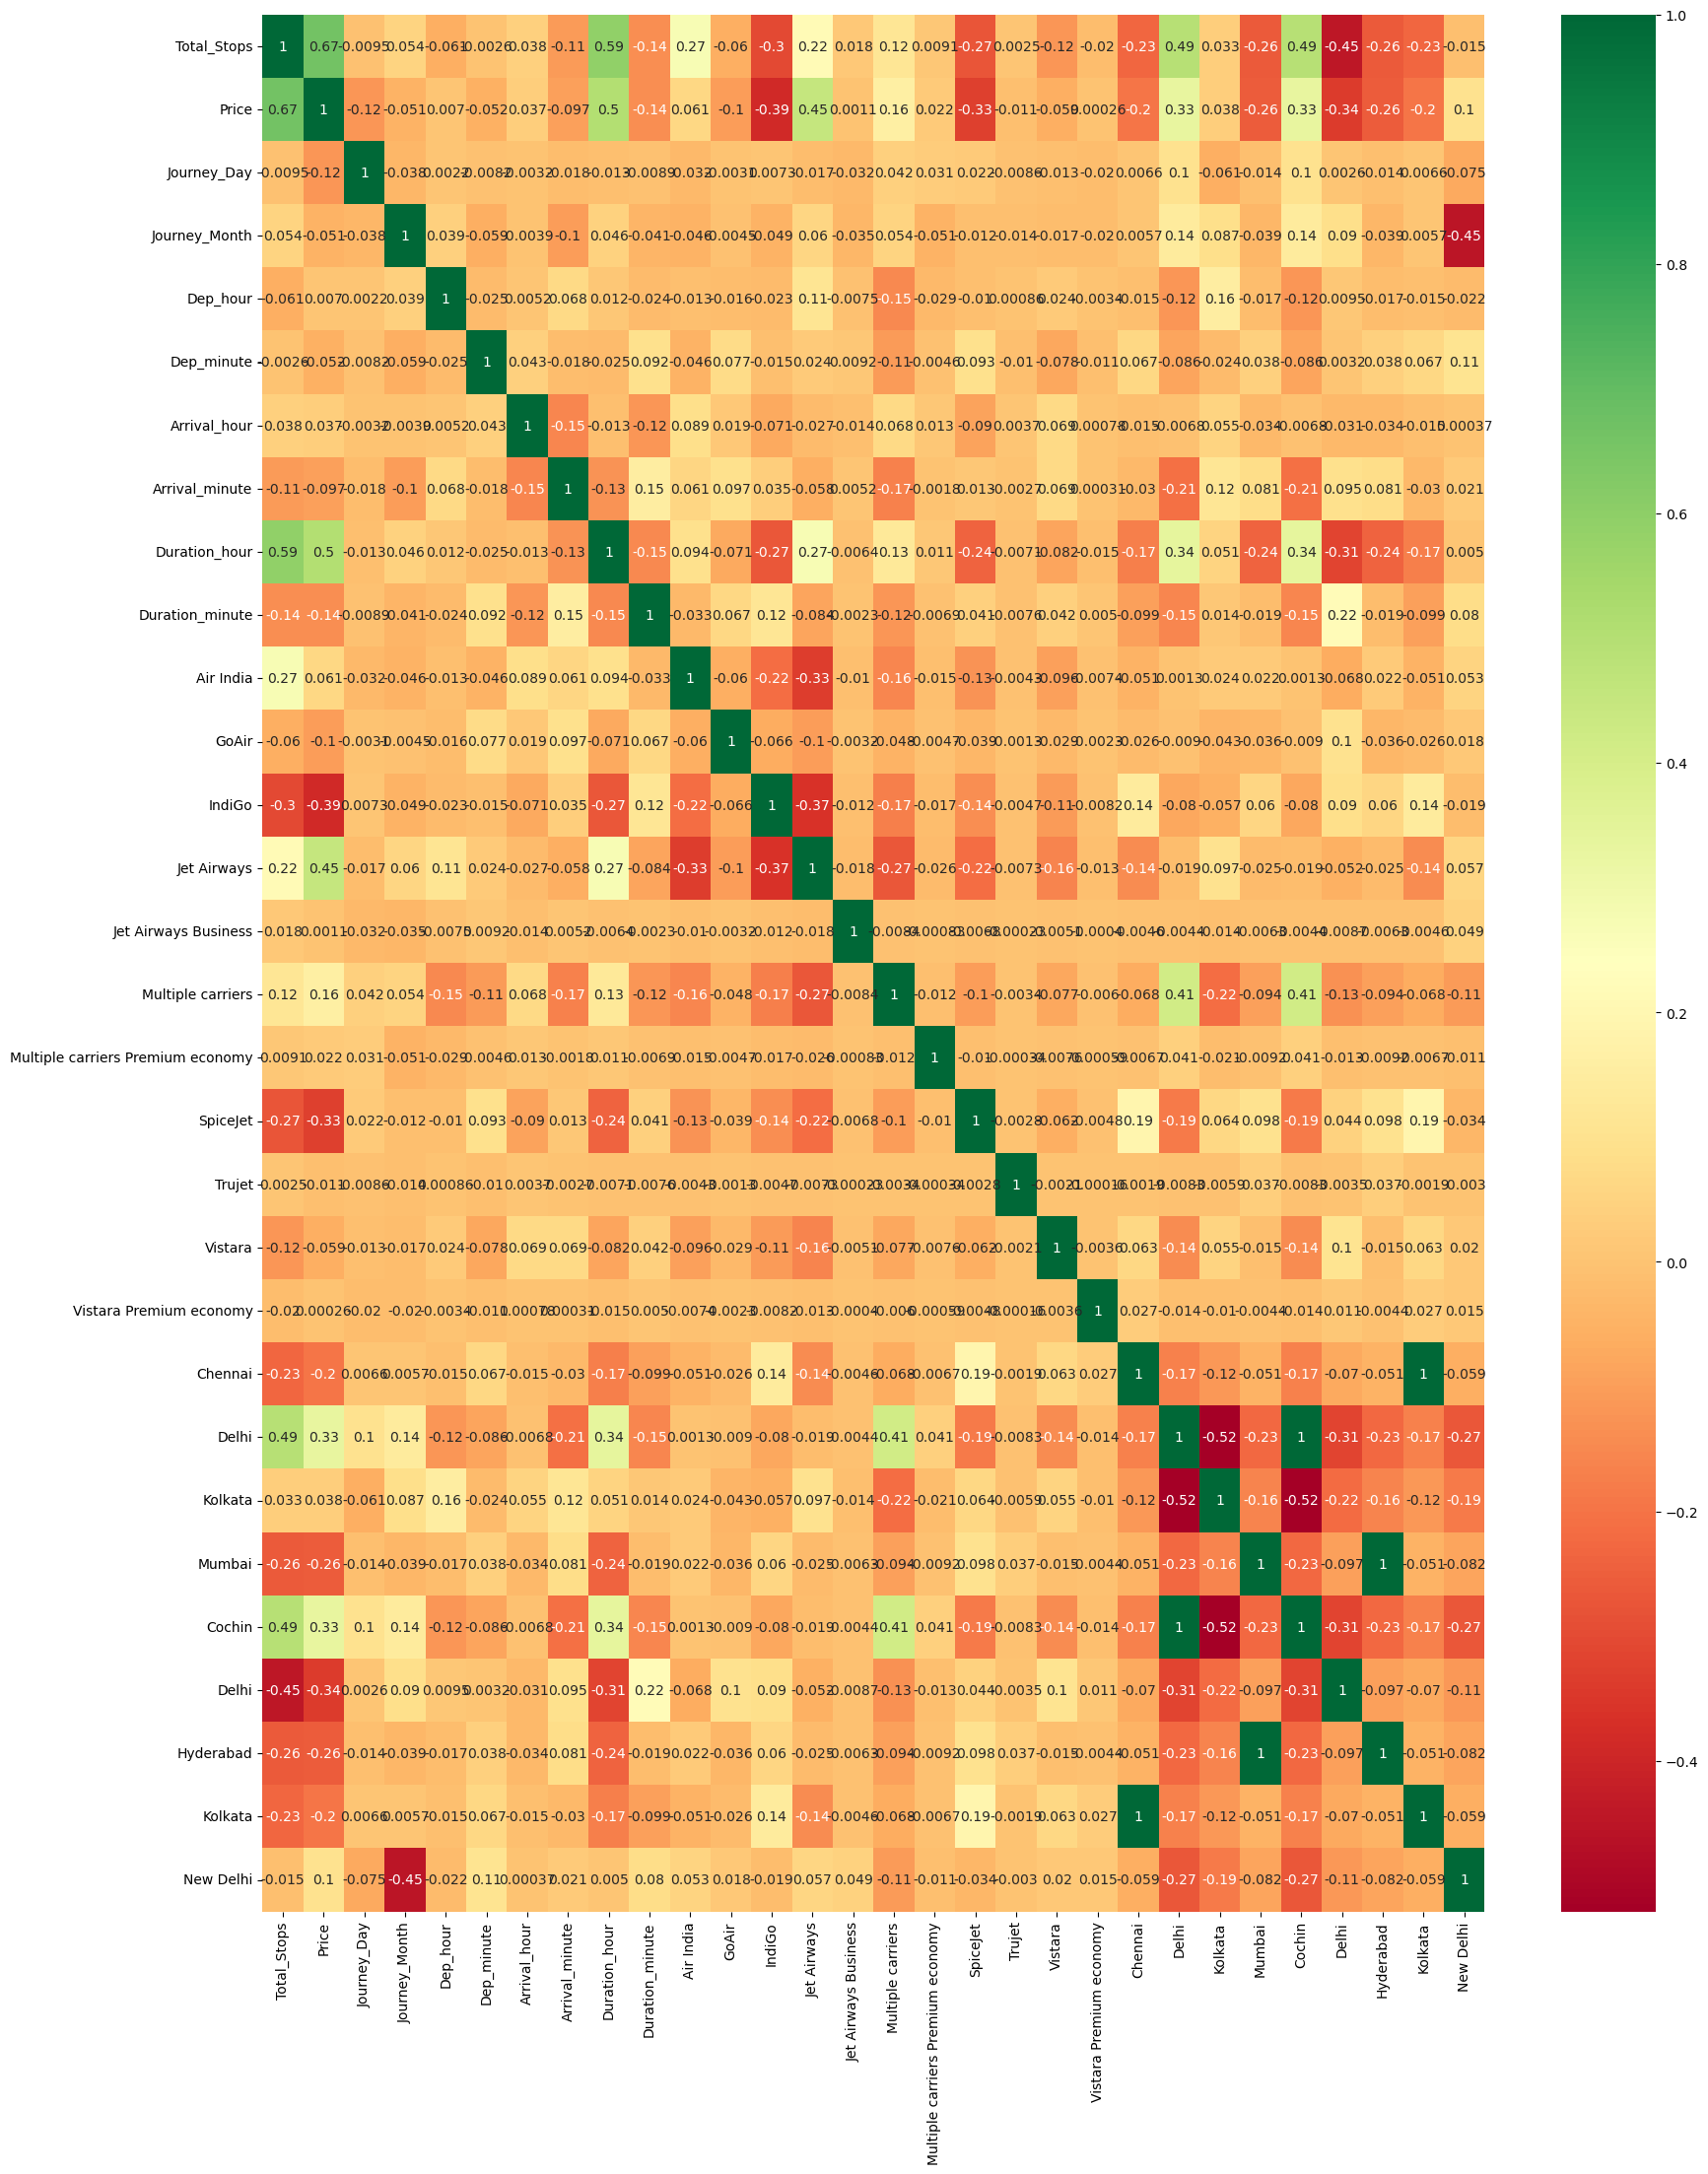

In [44]:
plt.figure(figsize=(20,25))
sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")

### MODEL SELECTION

In [45]:
x=data.drop('Price',axis=1)

In [46]:
y=data.Price

In [47]:
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [49]:
x_train.shape

(8545, 29)

In [50]:
y_train.shape

(8545,)

In [51]:
x_test.shape

(2137, 29)

In [52]:
y_test.shape

(2137,)

### LINEAR REGRESSION

In [53]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [54]:
y_predict=model.predict(x_test)

In [55]:
model.coef_

array([ 2.57470178e+03, -5.38673342e+01, -3.42495952e+02,  1.27111572e+01,
       -5.15237795e+00, -6.23441523e+00,  2.19705400e+00,  1.93370225e+01,
        1.09042792e-01,  1.59815286e+03,  3.04839058e+02,  2.29444495e+02,
        4.12703440e+03, -6.97973681e+02,  3.36815051e+03,  3.89310085e+03,
       -2.78137098e+02, -2.30843006e+03,  2.09671832e+03,  3.36927750e+03,
        9.22714077e+01,  2.09990375e+02,  3.14793029e+02, -7.40038896e+02,
        2.09990375e+02, -6.75074555e+02, -7.40038896e+02,  9.22714077e+01,
        7.98058639e+02])

In [56]:
model.intercept_

6561.1776345607805

### MODEL EVALUATION

In [57]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error


In [58]:
r2_linear=r2_score(y_test,y_predict)
print(r2_linear)

0.6253379588921959


In [59]:
mse_linear=mean_squared_error(y_test,y_predict)
print(mse_linear)

6124336.26988977


In [60]:
import math
rmse_linear=(math.sqrt(mean_squared_error(y_test,y_predict)))
print(rmse_linear)

2474.7396367880337


In [61]:
mae_linear=mean_absolute_error(y_test,y_predict)
print(mae_linear)

1825.5197902730438


<Axes: xlabel='Price', ylabel='Density'>

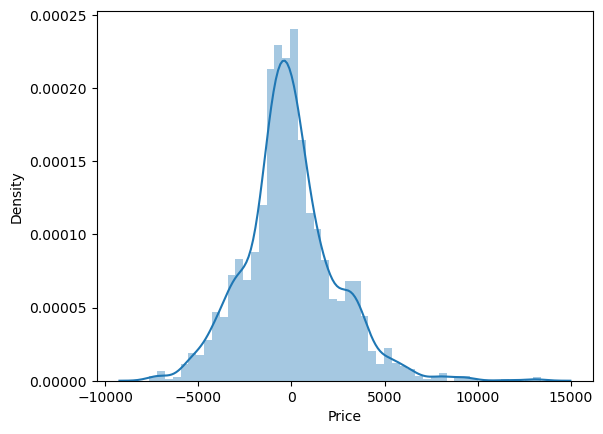

In [62]:
sns.distplot(y_test-y_predict,kde=True)

## USE KNN REGRESSION

In [63]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error 

rmse=[]
for K in range(1,20):
    model=KNeighborsRegressor(n_neighbors=K)
    model.fit(x_train,y_train)
    y_predict= model.predict(x_test)
    error=np.sqrt(mean_squared_error(y_test,y_predict))
    rmse.append(error)
    print("RMSQ value is ", K ,"is",error)
    


RMSQ value is  1 is 3019.7411498335514
RMSQ value is  2 is 2628.6571317433213
RMSQ value is  3 is 2577.2526495124034
RMSQ value is  4 is 2591.03780651556
RMSQ value is  5 is 2578.990396786665
RMSQ value is  6 is 2606.2721303785293
RMSQ value is  7 is 2612.870482544891
RMSQ value is  8 is 2649.902223270004
RMSQ value is  9 is 2669.089606929169
RMSQ value is  10 is 2688.246123684136
RMSQ value is  11 is 2706.9837691218804
RMSQ value is  12 is 2735.684207236643
RMSQ value is  13 is 2771.4680164169704
RMSQ value is  14 is 2795.8150861458066
RMSQ value is  15 is 2803.8652242004346
RMSQ value is  16 is 2817.465077271956
RMSQ value is  17 is 2835.4517084505114
RMSQ value is  18 is 2848.9734436307913
RMSQ value is  19 is 2862.7365980167997


In [64]:
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [65]:
y_predict=knn.predict(x_test)

In [66]:
y_predict

array([16315. ,  5158.2,  8536. , ...,  6471.8,  7535.8, 11467.6])

In [67]:
knn.score(x_train,y_train)

0.7392649629645248

In [68]:
mse_knn=mean_squared_error(y_test,y_predict)
print(mse_knn)

6651191.466717839


In [69]:
rmse_knn=(math.sqrt(mean_squared_error(y_test,y_predict)))
print(rmse_knn)

2578.990396786665


In [70]:
r2_knn=r2_score(y_test,y_predict)
print(r2_knn)

0.5931070958707879


In [71]:
mae_knn=mean_absolute_error(y_test,y_predict)
print(mae_knn)

1811.086695052979


<Axes: xlabel='Price', ylabel='Density'>

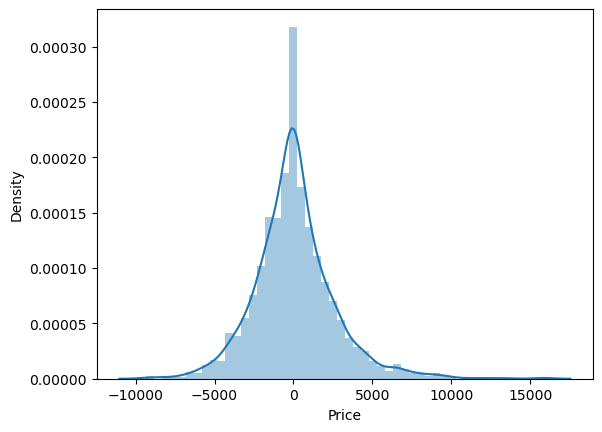

In [72]:
sns.distplot(y_test-y_predict)

### SVM REGRESSION

In [73]:
from sklearn.svm import SVR
model=SVR()
model.fit(x_train,y_train)

SVR()

In [74]:
y_predict=model.predict(x_test)

In [75]:
model.score(x_train,y_train)

0.0019268153259717202

In [76]:
rmse_svm=math.sqrt(mean_squared_error(y_test,y_predict))
print(rmse_svm)

4037.520350398129


In [77]:
rme_svm=mean_squared_error(y_test,y_predict)
print(rme_svm)

16301570.579879029


In [78]:
r2_Score_svm=r2_score(y_test,y_predict)
print(r2_Score_svm)

0.002736061906291387


In [79]:
mae_svm=mean_absolute_error(y_test,y_predict)
print(mae_svm)

3371.0585212809847


<Axes: xlabel='Price', ylabel='Density'>

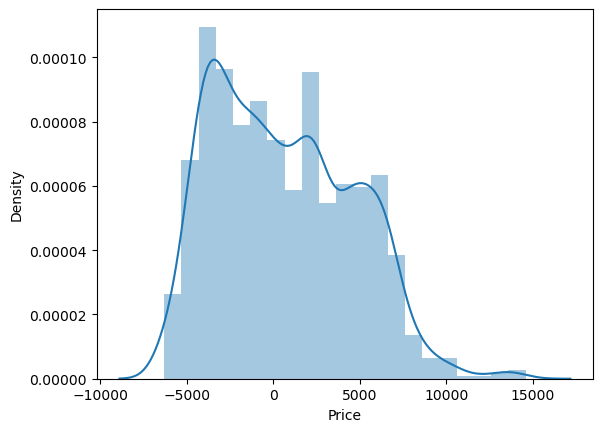

In [80]:
sns.distplot(y_test-y_predict)

### DECISION TREE

In [81]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [82]:
y_predict=model.predict(x_test)
y_predict

array([16840.,  4959.,  9187., ...,  7031., 13339., 14335.])

In [83]:
model.score(x_train,y_train)

0.9602154234481234

In [84]:
r2_dt=r2_score(y_test,y_predict)
print(r2_dt)

0.7003964750041467


In [85]:
mse_dt=mean_squared_error(y_test,y_predict)
print(mse_dt)

4897407.619126727


In [86]:
rmse_dt=math.sqrt(mean_squared_error(y_test,y_predict))
print(rmse_dt)

2213.008725497197


In [87]:
mae_dt=mean_absolute_error(y_test,y_predict)
print(mae_dt)

1319.6462047887935


<Axes: xlabel='Price', ylabel='Density'>

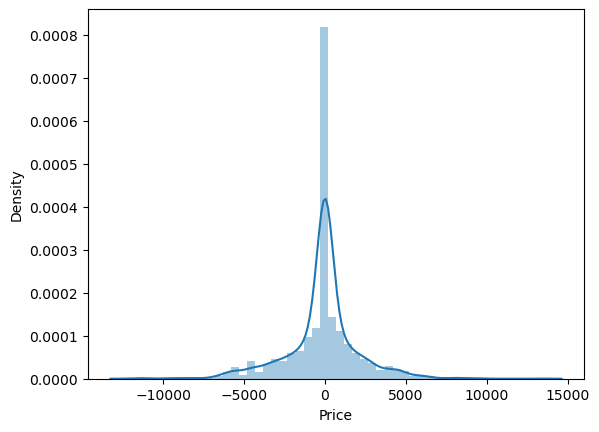

In [88]:
sns.distplot(y_test-y_predict)

## BAGGING REGRESSION

In [89]:
from sklearn.ensemble import BaggingRegressor
model_BR=BaggingRegressor(base_estimator=knn,n_estimators=20)

In [90]:
model_BR.fit(x_train,y_train)


BaggingRegressor(base_estimator=KNeighborsRegressor(), n_estimators=20)

In [91]:
y_predict=model_BR.predict(x_test)

In [92]:
y_predict

array([15440.64,  5850.64,  9037.82, ...,  6764.9 ,  7244.23, 12275.64])

In [93]:
model_BR.score(x_train,y_train)

0.7469673039630078

In [94]:
r2_br=r2_score(y_test,y_predict)
print(r2_br)

0.6007866829701791


In [95]:
mse=mean_squared_error(y_test,y_predict)
print(mse)

6525658.670089941


In [96]:
rmse=math.sqrt(mean_squared_error(y_test,y_predict))
print(rmse)

2554.536879767043


In [97]:
mae=mean_absolute_error(y_test,y_predict)
print(mae)

1818.762775767964


<Axes: xlabel='Price', ylabel='Density'>

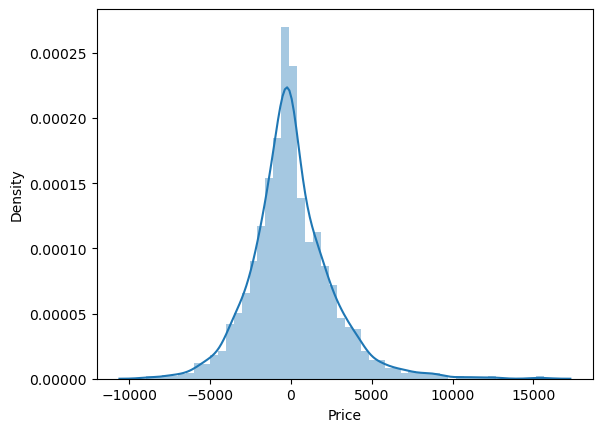

In [98]:
sns.distplot(y_test-y_predict)

## BOOSTING REGRESSOR 

In [99]:
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor()
model.fit(x_train,y_train)

GradientBoostingRegressor()

In [100]:
y_predict=model.predict(x_test)

In [101]:
y_predict

array([14666.57220058,  7238.86862114,  9584.01111837, ...,
        7236.62387496, 11208.52510032, 12110.16580235])

In [102]:
model.score(x_train,y_train)

0.7660517107951612

In [103]:
r2_b=r2_score(y_test,y_predict)
print(r2_b)

0.744418998447486


In [104]:
mse=mean_squared_error(y_test,y_predict)
print(mse)

4177802.4618523633


In [105]:
rmse=math.sqrt(mean_squared_error(y_test,y_predict))
print(rmse)

2043.9673338515865


In [106]:
mae=mean_absolute_error(y_test,y_predict)
print(mae)

1497.4799265090421


<Axes: xlabel='Price', ylabel='Density'>

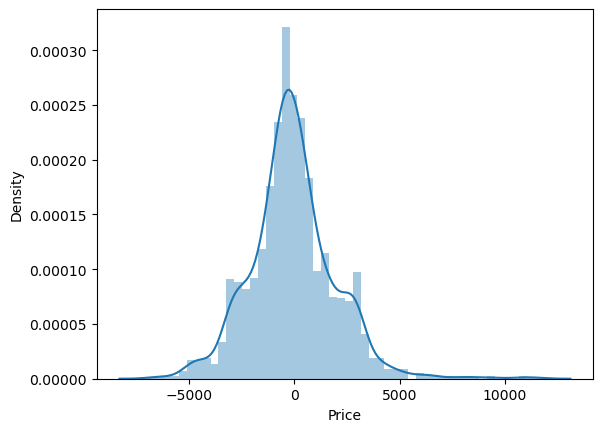

In [107]:
sns.distplot(y_test-y_predict)

## RANDOM FOREST

In [108]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [109]:
y_predict=model.predict(x_test)
y_predict

array([16940.19      ,  5628.83      ,  8941.47      , ...,
        6665.22933333, 12701.58833333, 12881.515     ])

In [110]:
model.score(x_train,y_train)

0.9459292460617856

In [111]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[10,50,100,200]
max_features=['auto','sqrt']
max_depth=[10,20,30]
max_depth.append(None)
min_samples_split=[2,4,6,8,10,12,14]
min_samples_leaf=[1,3,5,7,8,10]
bootstrap=[True,False]

In [112]:
random_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}
rf_r1=RandomForestRegressor(random_state=42)

rf_cv=RandomizedSearchCV(estimator=rf_r1,n_iter=100,cv=3,verbose=2,n_jobs=-1,random_state=42,param_distributions=random_grid)

In [113]:
rf_cv.fit(x_train,y_train)
rf_best_params=rf_cv.best_params_
print(f"Best_parameter : {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best_parameter : {'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20})


In [114]:
rf_r2=RandomForestRegressor(n_estimators=100,min_samples_split=6,min_samples_leaf=1,max_features='sqrt',max_depth=20)

In [115]:
rf_r2.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_split=6)

In [116]:
y_predict=rf_r2.predict(x_test)

In [117]:
y_predict

array([16178.7956872 ,  5484.40733117,  8484.04995015, ...,
        6650.24672546, 12244.84937367, 12490.21679792])

In [118]:
r2_rf=r2_score(y_test,y_predict)
print(r2_rf)

0.7979548744500147


In [119]:
mse=math.sqrt(mean_squared_error(y_test,y_predict))
print(mse)

1817.3302497571574


In [120]:
rmse=mean_squared_error(y_test,y_predict)
print(rmse)

3302689.2366824117


In [121]:
mae=mean_absolute_error(y_test,y_predict)
print(mae)

1252.3260554167891


<Axes: xlabel='Price', ylabel='Density'>

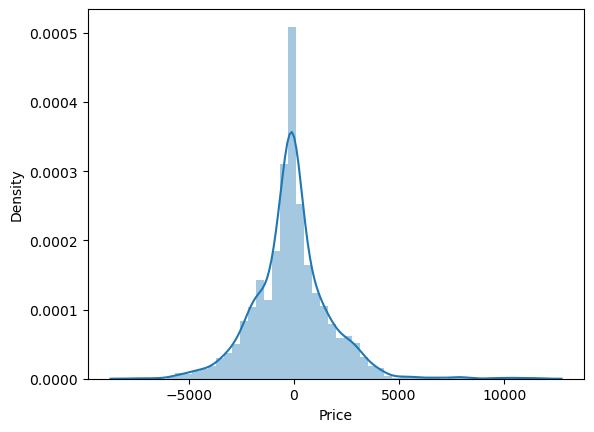

In [122]:
sns.distplot(y_test-y_predict)

Text(0, 0.5, 'predict')

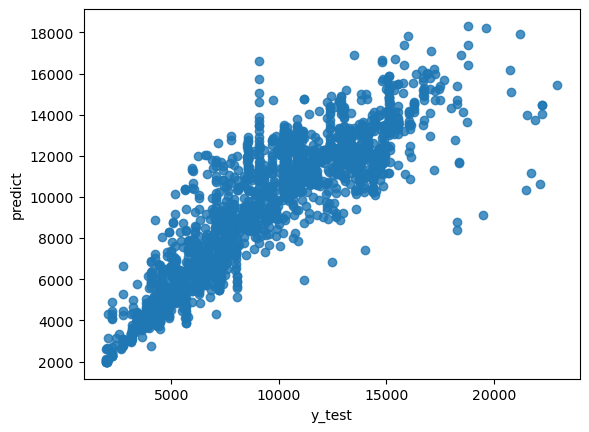

In [123]:
plt.scatter(y_test,y_predict,alpha=0.8)
plt.xlabel('y_test')
plt.ylabel('predict')

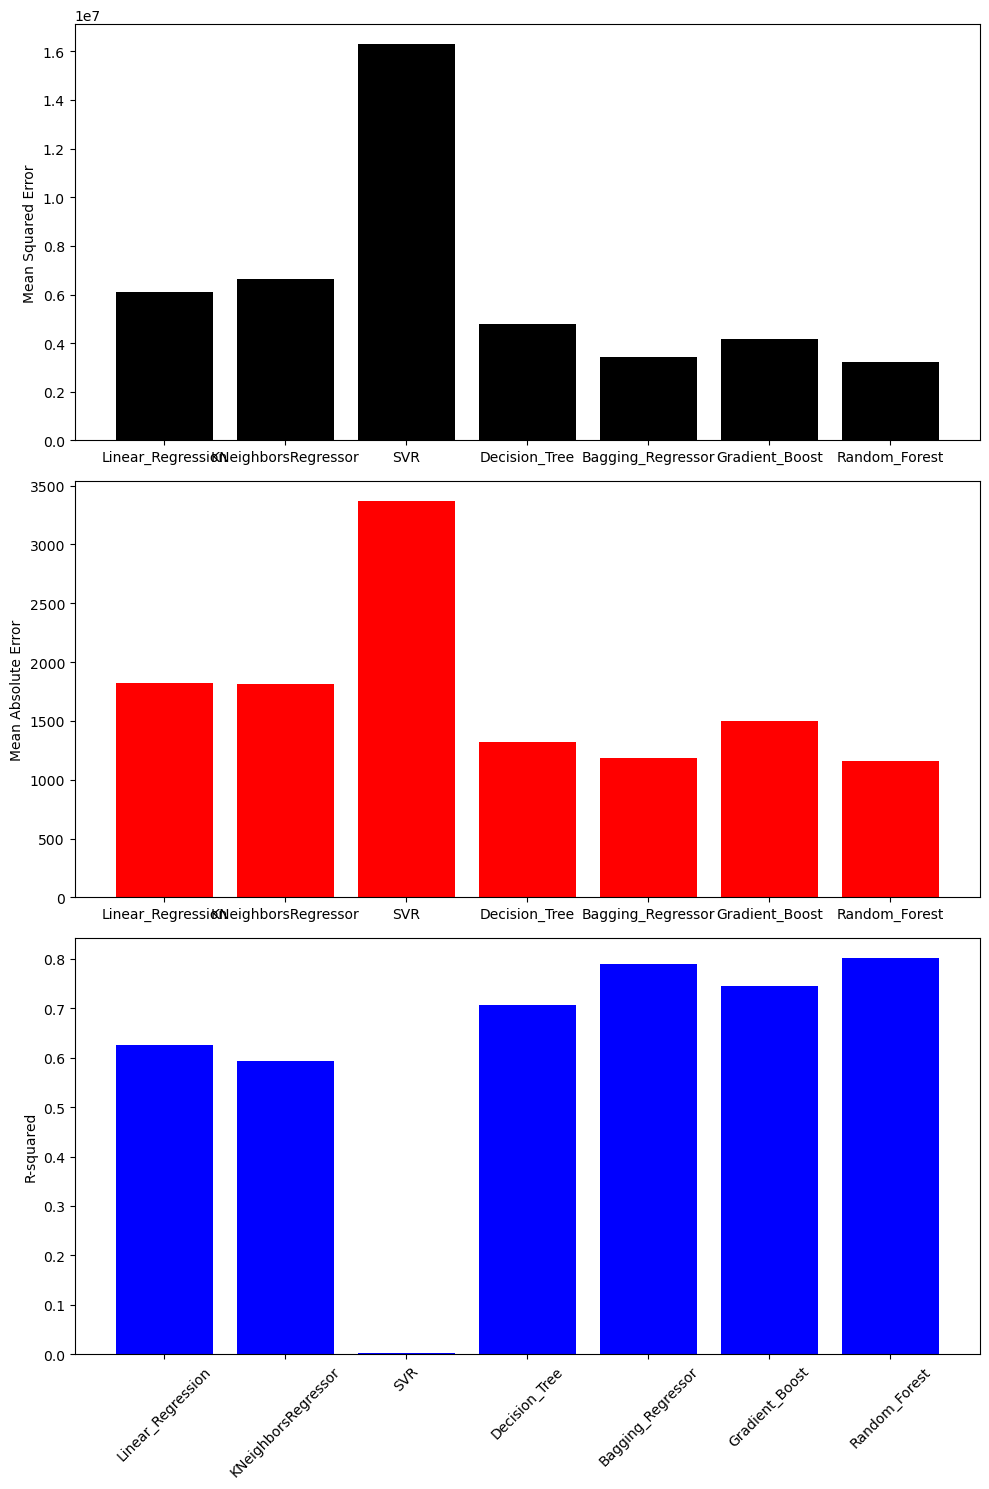

In [125]:
models = {
    'Linear_Regression': LinearRegression(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'SVR': SVR(),
    'Decision_Tree': DecisionTreeRegressor(),
    'Bagging_Regressor': BaggingRegressor(),
    'Gradient_Boost': GradientBoostingRegressor(),
    'Random_Forest': RandomForestRegressor()
}

mean_squared_errors = {}
mean_absolute_errors = {}
r2_scores = {}

for name, model in zip(models.keys(),models.values()):
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    mse = mean_squared_error(y_test, y_predict)
    mae = mean_absolute_error(y_test, y_predict)
    r2score = r2_score(y_test, y_predict)

    mean_squared_errors[name] = mse
    mean_absolute_errors[name] = mae
    r2_scores[name] = r2score

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))

ax1.bar(mean_squared_errors.keys(), mean_squared_errors.values(), color='k')
ax1.set_ylabel('Mean Squared Error')

ax2.bar(mean_absolute_errors.keys(), mean_absolute_errors.values(), color='r')
ax2.set_ylabel('Mean Absolute Error')

ax3.bar(r2_scores.keys(), r2_scores.values(), color='b')
ax3.set_ylabel('R-squared')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()